Midterm Project

we are trying to estimate price of house, apartment....


In [117]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
from custom_utils import df_spliter_by_data_type
from custom_utils import y_from_x_spliter
from custom_utils import outliers_remover
from custom_utils import df_trainer
from custom_utils import data_scaler
from custom_utils import production_data_scaler
from custom_utils import model_generator
from custom_utils import plot_builder
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [118]:
sourceDf = pd.read_excel('../data/Data_MidTerm_Project_Real_State_Regression.xls')
sourceDf

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


#functions

In [119]:
def df_cleaner(df):
    df = df.drop(
        ['date', 'waterfront', 'zipcode', 'lat', 'long', 'id'],
        errors='ignore',
        axis='columns'
    )
    df = df.reindex(sorted(df.columns), axis=1)
    return df

drop un usable columns

In [120]:
sourceDf = df_cleaner(sourceDf)

split price as Y and the res as X

In [121]:
X, Y = y_from_x_spliter(sourceDf, 'price')

removing outliers

In [122]:
X = outliers_remover(X)

Split Numerical from categorical
date type is not count as categorical, so we got no column in categorical

In [123]:
numerical, categorical = df_spliter_by_data_type(X)

#get dummies from categorical
#there is no categorical column so to avoid errors this step is ignored

In [124]:
#categorical_dummies = pd.get_dummies(categorical, drop_first=True)
#categorical_dummies

In [125]:
x_train, x_test, y_train, y_test, c_train, c_test = df_trainer(X, Y, categorical)

scale data

In [126]:
x_train_scaled, x_test_scaled = data_scaler(x_train, x_test, _, _, scale_categorical=False)

building a model

In [127]:
model, model_score = model_generator(x_train_scaled, x_test_scaled, y_train, y_test)

predict

In [128]:
y_pred = model.predict(x_test_scaled)
y_pred_train = model.predict(x_train_scaled)

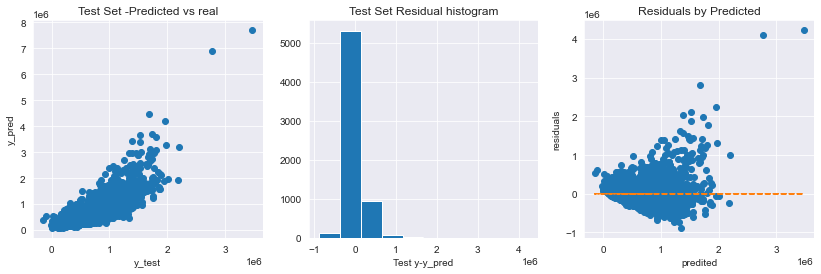

In [129]:
data_plot = plot_builder(
    y_test=y_test,
    y_pred=y_pred,
)
data_plot

check R2 score

In [130]:
R2 = r2_score(y_test, y_pred)
R2_train = model.score(x_train_scaled, y_train)
R2_test = model.score(x_test_scaled, y_test)
R2_train
# R2_test

0.6402987157881561

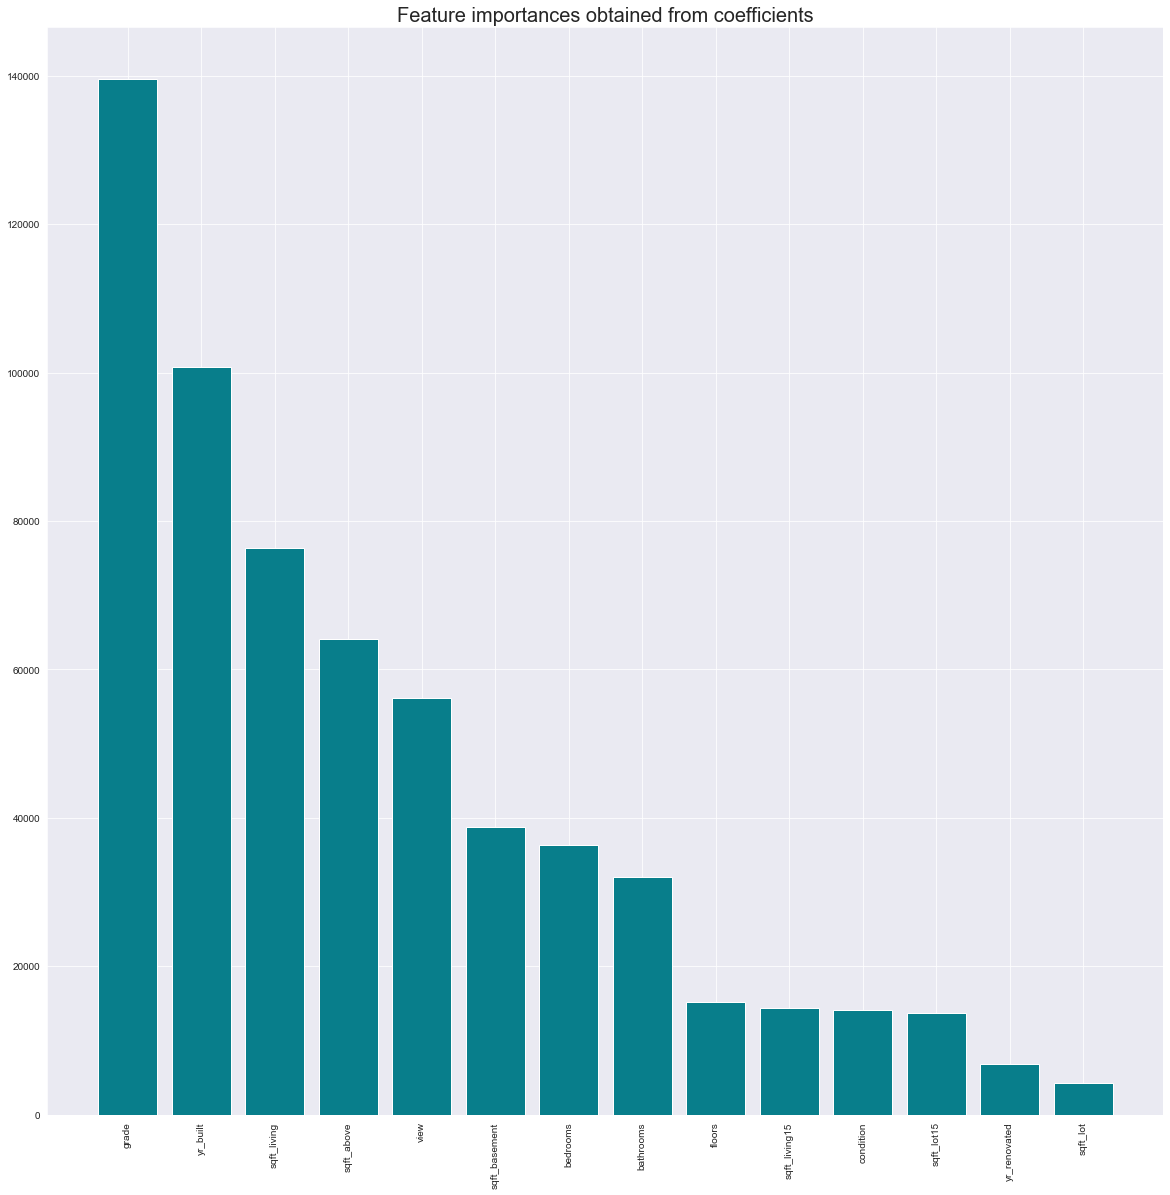

In [134]:
features_importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [132]:

# button = widgets.Button(description="Do you wanna know the price of your home?")
# button
# output = widgets.Output()

## Test with fake data

your estimate price is:  178848.9


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


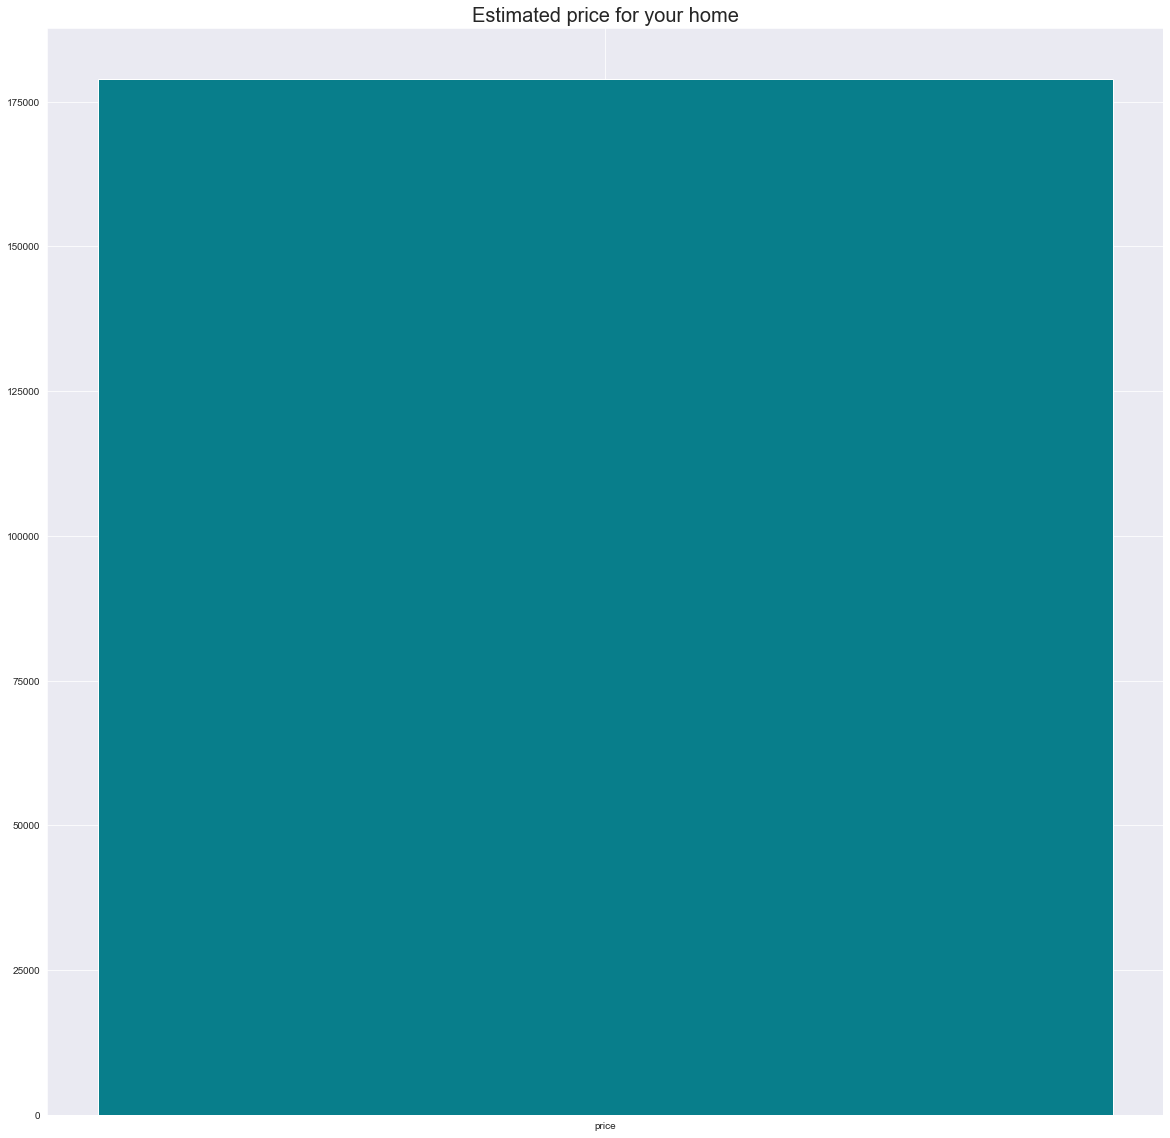

In [143]:
# test with fake data
state = {
    "bedrooms": 2,
    "bathrooms": 1,
    "sqft_living":500,
    "sqft_lot": 10,
    "floors": 1,
    "yr_built":2000,
    "view": 2,
    "condation": 2,
    "grade": 7,
    "sqft_above": 20,
    "sqft_basement": 3,
    "yr_renovated": 2000,
    "sqft_living15": 1000,
    "sqft_lot15": 1200
}

fake_df = pd.DataFrame(state, index=[0])
fake_df = df_cleaner(fake_df)
fake_numerical_scaled = production_data_scaler(fake_df, x_train)
y_pred_train_fake = model.predict(fake_numerical_scaled)
plt.bar(x='price', height=np.round(y_pred_train_fake, 1), color='#087E8B')
plt.rcParams["figure.figsize"] = (20, 20)
plt.title('Estimated price for your home', size=20)
plt.xticks(rotation='horizontal')
print('your estimate price is: ',abs(np.round(y_pred_train_fake, 1)[0]))
plt.show()

